In [1]:
from netCDF4 import Dataset
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [25]:
nc = Dataset('../../measurements/bathymetry/erie_lld.grd')

In [4]:
import cmocean

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [9]:
topo = -nc.variables['z'][:] #[::10,::10]
x = nc.variables['x'][:] #[::10]
y = nc.variables['y'][:] #[::10]
lon_0 = x.mean()
lat_0 = y.mean()
lon, lat = np.meshgrid(x, y)
m = Basemap(width=500000*0.8,height=300000*0.8, resolution='f',projection='stere',lat_0=lat_0+0.2,lon_0=lon_0-0.2)
x, y = m(lon, lat)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


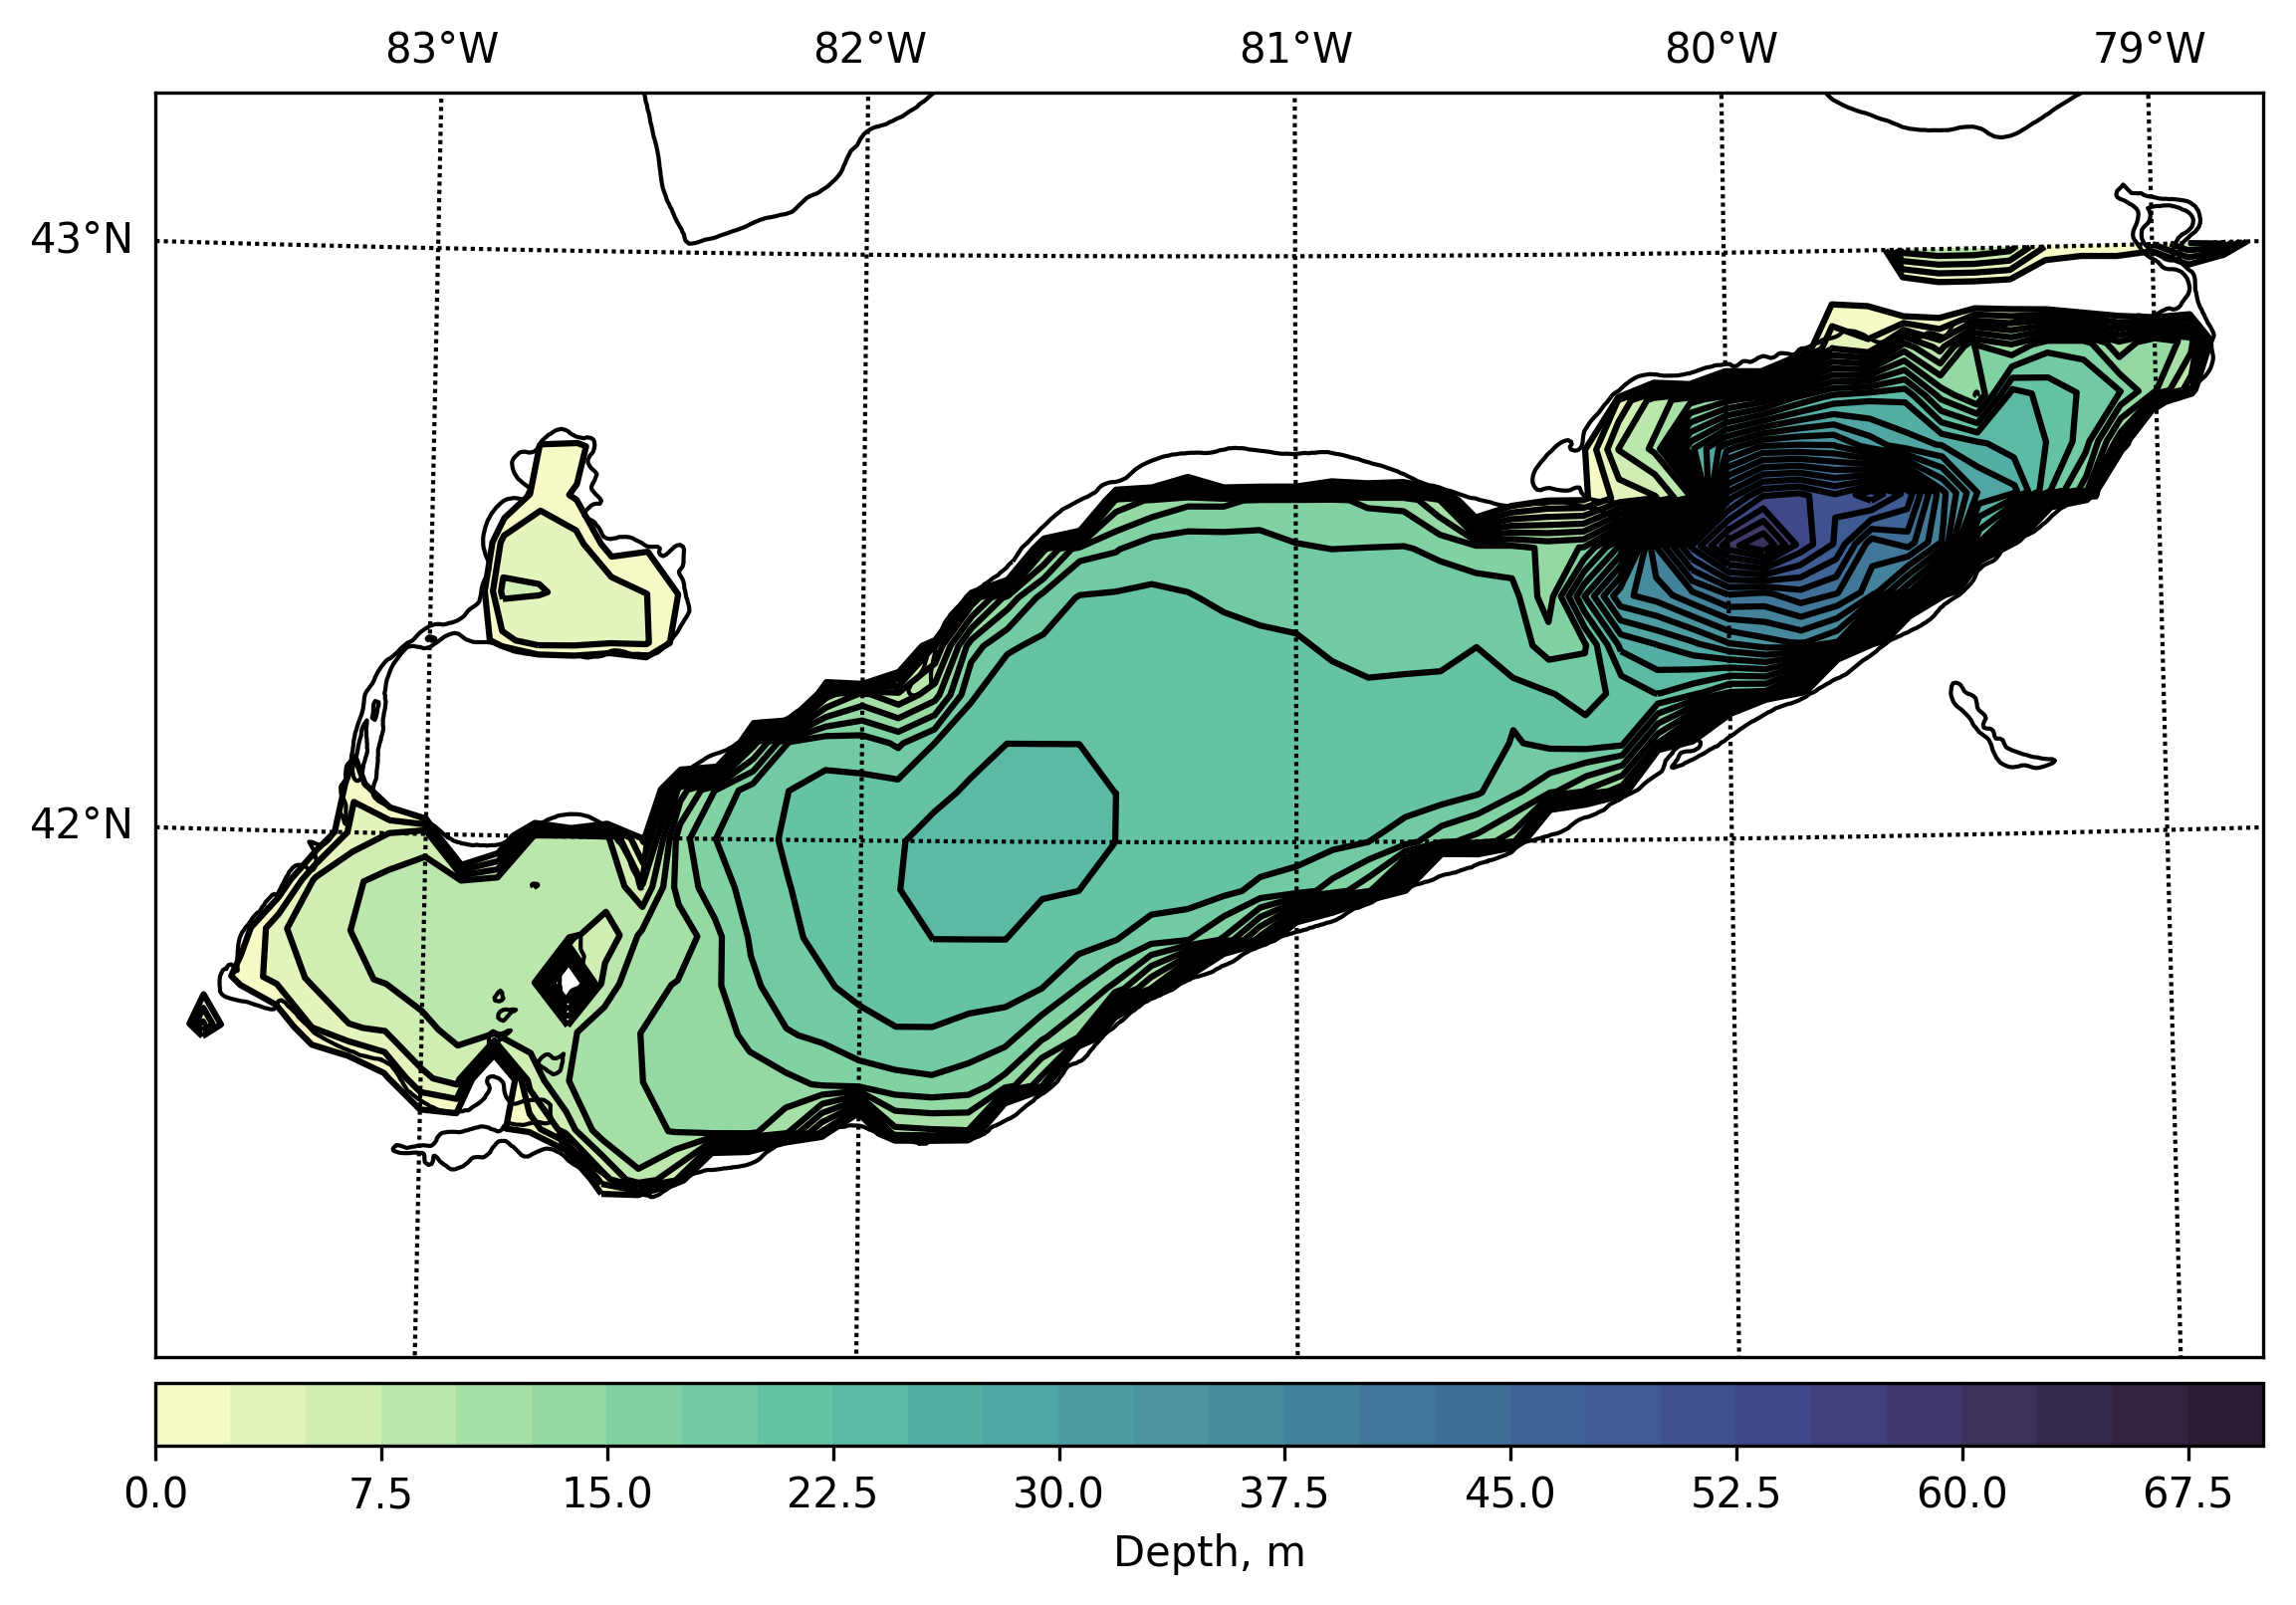

In [10]:




levels1 = np.linspace(0,70,14*2+1)
levels2 = np.linspace(0,70,14+1)
# levels2 = np.linspace(-10,0,14*2+1)
plt.figure(figsize=(12,6), dpi=300)

# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
m.drawcoastlines()
m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])
cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
plt.contour(x,y,topo, levels=levels1, colors='k')  # negative contours will be dashed by default
                 
# c = m.contourf(x,y,topo, levels=levels2,cmap=cmocean.cm.solar)
cbar = m.colorbar(cax,location='bottom')

# cbar = m.colorbar(cs, location='bottom')
cbar.set_label('Depth, m')
plt.show()
# plt.savefig('Bathymetry.png')


In [11]:
import matplotlib.pyplot as plt

In [12]:
import gdal

ModuleNotFoundError: No module named 'gdal'

In [ ]:


raster = gdal.Open('ice/grid2011/g20110202.ct')
band = raster.GetRasterBand(1)
array = band.ReadAsArray()
plt.imshow(array)

In [ ]:
band

In [ ]:
x

In [64]:
c={}
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/central.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
for d in np.linspace(0,64.5,65/0.5):
    neg = x[x<-d]
    c[d] = -neg.sum(axis=0)/0.5
c

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


{0.0: 91595744.0,
 0.5: 91590576.0,
 1.0: 91569136.0,
 1.5: 91551384.0,
 2.0: 91529728.0,
 2.5: 91504920.0,
 3.0: 91475160.0,
 3.5: 91438176.0,
 4.0: 91395456.0,
 4.5: 91344384.0,
 5.0: 91280944.0,
 5.5: 91208088.0,
 6.0: 91106296.0,
 6.5: 90999264.0,
 7.0: 90847008.0,
 7.5: 90654912.0,
 8.0: 90435120.0,
 8.5: 90200832.0,
 9.0: 89880576.0,
 9.5: 89521496.0,
 10.0: 88979400.0,
 10.5: 88483912.0,
 11.0: 87634432.0,
 11.5: 86570672.0,
 12.0: 85193464.0,
 12.5: 83913632.0,
 13.0: 82309744.0,
 13.5: 80934392.0,
 14.0: 79251048.0,
 14.5: 77833640.0,
 15.0: 76432248.0,
 15.5: 74903264.0,
 16.0: 73270792.0,
 16.5: 71451760.0,
 17.0: 69314880.0,
 17.5: 66707092.0,
 18.0: 64211384.0,
 18.5: 61514864.0,
 19.0: 58156340.0,
 19.5: 52280204.0,
 20.0: 46895704.0,
 20.5: 39887812.0,
 21.0: 33338192.0,
 21.5: 20598596.0,
 22.0: 12724782.0,
 22.5: 10737733.0,
 23.0: 5283979.0,
 23.5: 4031520.0,
 24.0: 52864.1328125,
 24.5: 34660.23046875,
 25.0: 19105.09765625,
 25.5: 6217.869140625,
 26.0: -0.0,
 26.5:

In [78]:
depths[::-1]

array([63. , 62.5, 62. , 61.5, 61. , 60.5, 60. , 59.5, 59. , 58.5, 58. ,
       57.5, 57. , 56.5, 56. , 55.5, 55. , 54.5, 54. , 53.5, 53. , 52.5,
       52. , 51.5, 51. , 50.5, 50. , 49.5, 49. , 48.5, 48. , 47.5, 47. ,
       46.5, 46. , 45.5, 45. , 44.5, 44. , 43.5, 43. , 42.5, 42. , 41.5,
       41. , 40.5, 40. , 39.5, 39. , 38.5, 38. , 37.5, 37. , 36.5, 36. ,
       35.5, 35. , 34.5, 34. , 33.5, 33. , 32.5, 32. , 31.5, 31. , 30.5,
       30. , 29.5, 29. , 28.5, 28. , 27.5, 27. , 26.5, 26. , 25.5, 25. ,
       24.5, 24. , 23.5, 23. , 22.5, 22. , 21.5, 21. , 20.5, 20. , 19.5,
       19. , 18.5, 18. , 17.5, 17. , 16.5, 16. , 15.5, 15. , 14.5, 14. ,
       13.5, 13. , 12.5, 12. , 11.5, 11. , 10.5, 10. ,  9.5,  9. ,  8.5,
        8. ,  7.5,  7. ,  6.5,  6. ,  5.5,  5. ,  4.5,  4. ,  3.5,  3. ,
        2.5,  2. ,  1.5,  1. ,  0.5,  0. ])

### This is the volume of layers of lake Erie (eastern basin) with 0.5 step in depth np.linspace(0,63,63.5/0.5)

In [96]:
e_vol=[]
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/eastern.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63,63.5/0.5)
prev_volume_below_d = 0
for d in depths[::-1]:
    neg = x[x<-d]
    e_vol.append( -neg.sum(axis=0)*0.75*(111.32*0.0008333333*1000)**2)
e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [98]:
sum(e_vol)*1e-9

174.72982637721472

In [6]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
w = neg.sum(axis=0)
w

-3048562.2

In [7]:
dataset = ds

In [8]:
c+e+w

-75918530.0

In [54]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/erie_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
neg.sum(axis=0)

-72950530.0

In [22]:
dataset=ds

In [23]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

Band Type=Float32
Min=-62.477, Max=355.665


In [24]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                             dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 7201 x 2401 x 1
Projection is 
Origin = (-84.00041666665, 43.000416666549995)
Pixel Size = (0.0008333333, -0.0008333333)


In [97]:
e*1e-9*0.75*(111.32*0.0008333333*1000)**2

-174.72982637721475

In [33]:
scanline = band.ReadRaster(xoff=0, yoff=0,
                           xsize=band.XSize, ysize=1,
                           buf_xsize=band.XSize, buf_ysize=1,
                           buf_type=gdal.GDT_Float32)

In [34]:
import struct
tuple_of_floats = struct.unpack('f' * band.XSize, scanline)

In [44]:
print('{:.8f}'.format((np.array(tuple_of_floats) - tuple_of_floats[0])[4]))

0.00001526
